<a href="https://colab.research.google.com/github/kartik5465/deeplearning/blob/master/Write_a_Program_to_implement_regularization_to_prevent_the_model_from_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Deep Learning/Bike-Sharing-Dataset/hour.csv')
# Feature engineering
ohe_features = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for feature in ohe_features:
    dummies = pd.get_dummies(data[feature], prefix=feature, drop_first=False)
    data = pd.concat([data, dummies], axis=1)

drop_features = ['instant', 'dteday', 'season', 'weathersit',
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr', 'casual', 'registered']
data = data.drop(drop_features, axis=1)

In [ ]:
norm_features = ['cnt', 'temp', 'hum', 'windspeed']
scaled_features = {}
for feature in norm_features:
    mean, std = data[feature].mean(), data[feature].std()
    scaled_features[feature] = [mean, std]
    data.loc[:, feature] = (data[feature] - mean)/std

In [ ]:
# Save the final month for testing
test_data = data[-31*24:]
data = data[:-31*24]
# Extract the target field
target_fields = ['cnt']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]
# Create a validation set (based on the last )
X_train, y_train = features[:-30*24], targets[:-30*24]
X_val, y_val = features[-30*24:], targets[-30*24:]

In [ ]:
model = Sequential()
model.add(Dense(250, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [ ]:
n_epochs = 4000
batch_size = 1024

history = model.fit(X_train.values, y_train['cnt'],
                 validation_data=(X_val.values, y_val['cnt']),
                 batch_size=batch_size, epochs=n_epochs, verbose=0
                )

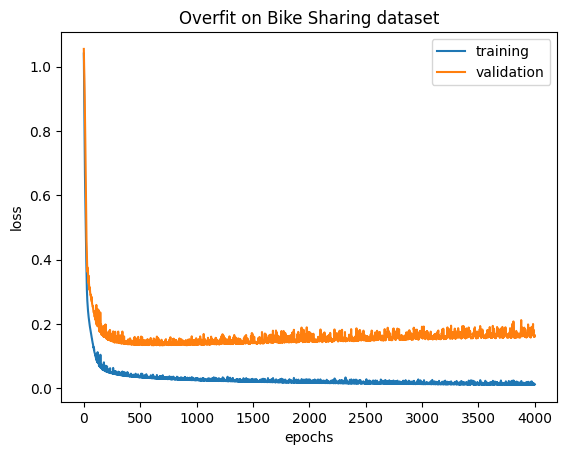

In [ ]:
plt.plot(np.arange(len(history.history['loss'])), history.history['loss'], label='training')
plt.plot(np.arange(len(history.history['val_loss'])), history.history['val_loss'], label='validation')
plt.title('Overfit on Bike Sharing dataset')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc=0)
plt.show()

In [ ]:
print('Minimum loss: ', min(history.history['val_loss']),
      '\nAfter ', np.argmin(history.history['val_loss']), ' epochs')

# Minimum loss:  0.140975862741
# After  730  epochs

Minimum loss:  0.1329479068517685 
After  700  epochs


In [ ]:
model_reg = Sequential()
model_reg.add(Dense(250, input_dim=X_train.shape[1], activation='relu',
            kernel_regularizer=regularizers.l2(0.005)))
model_reg.add(Dense(150, activation='relu'))
model_reg.add(Dense(50, activation='relu'))
model_reg.add(Dense(25, activation='relu',
            kernel_regularizer=regularizers.l2(0.005)))
model_reg.add(Dense(1, activation='linear'))

# Compile model
model_reg.compile(loss='mse', optimizer='sgd', metrics=['mse'])

In [ ]:
history_reg = model_reg.fit(X_train.values, y_train['cnt'],
validation_data=(X_val.values, y_val['cnt']),
                 batch_size=batch_size, epochs=n_epochs, verbose=0
                )

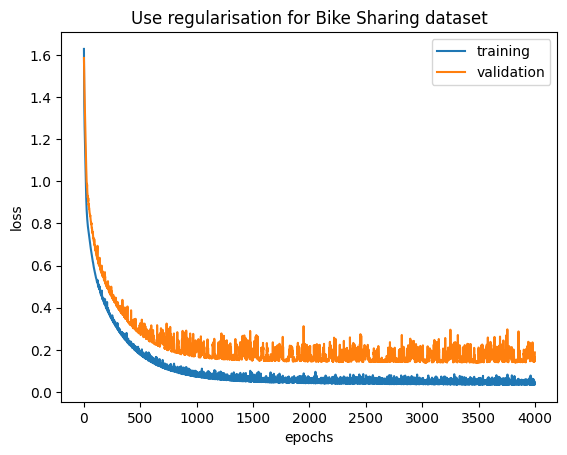

In [ ]:
plt.plot(np.arange(len(history_reg.history['loss'])), history_reg.history['loss'], label='training')
plt.plot(np.arange(len(history_reg.history['val_loss'])), history_reg.history['val_loss'], label='validation')
plt.title('Use regularisation for Bike Sharing dataset')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc=0)
plt.show()

In [ ]:
print('Minimum loss: ', min(history_reg.history['val_loss']),
      '\nAfter ', np.argmin(history_reg.history['val_loss']), ' epochs')

# Minimum loss:  0.13514482975
# After  3647  epochs

Minimum loss:  0.13927023112773895 
After  3031  epochs
